In [14]:
pip install snowflake-connector-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import snowflake.connector
import pandas as pd

# Set up connection parameters
user = "Mithun"
password = "Mithun123!!"
account = "lz05490.central-india.azure"
warehouse = "COMPUTE_WH"
database = "TIMESHEET"
schema = "FAKEDATA"
role = "ACCOUNTADMIN"
retry_attempts = 3  # Number of retry attempts

def establish_connection():
    try:
        # Establish connection
        conn = snowflake.connector.connect(
            user=user,
            password=password,
            account=account,
            warehouse=warehouse,
            database=database,
            schema=schema,
            role=role
        )
        return conn
    except snowflake.connector.errors.OperationalError as e:
        print(f"Connection error: {e}")
        return None

# Attempt to establish connection with retries
for attempt in range(retry_attempts):
    print(f"Attempting to connect (Attempt {attempt + 1})...")
    connection = establish_connection()
    if connection:
        print("Connection established successfully!")
        break
    else:
        print("Retrying connection...")
else:
    print("Failed to establish connection after multiple attempts.")

# If connection is successful, proceed with executing queries
if connection:
    # Create a cursor object
    cur = connection.cursor()

    # Execute a query to select data from the table
    cur.execute('SELECT * FROM TIMESHEET.FAKEDATA.FINALDATA')

    # Fetch the results
    rows = cur.fetchall()

    # Close the cursor and connection
    cur.close()
    connection.close()

    # Convert the result into a pandas DataFrame for easier manipulation
    df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])
    print(df.head())  # Display the first few rows of the DataFrame


Attempting to connect (Attempt 1)...
Connection established successfully!
             NAME                  EMAIL USERTYPE               ROLE  \
0   Joseph Peters  abigail38@example.com     user  software engineer   
1   Joseph Peters  abigail38@example.com     user  software engineer   
2   Joseph Peters  abigail38@example.com     user  software engineer   
3   Joseph Peters  abigail38@example.com     user  software engineer   
4  Jennifer Welch     aclark@example.org     user         consultant   

        PROJECT_NAME                             PROJECTID  \
0  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
1  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
2  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
3  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
4       Mcguire-Hall  24ac78dd-f13b-4b1c-b268-f4005d794c8e   

  PROJECT_START_PERIOD PROJECT_END_PERIOD    CATEGORY ALLOCATION_START  ...  \
0           2024-03-02         2024-06-28

EDA

In [16]:
df.head(5)

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,SUN,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,1.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
2,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
3,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,8.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
4,Jennifer Welch,aclark@example.org,user,consultant,Mcguire-Hall,24ac78dd-f13b-4b1c-b268-f4005d794c8e,2024-02-10,2024-06-09,Mobile App,2024-03-18,...,0.0,2024-03-19,2024-04-17,3,5,2,2,2,1,Similar left must step sound price add. Voice ...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2243 non-null   object 
 1   EMAIL                  2243 non-null   object 
 2   USERTYPE               2243 non-null   object 
 3   ROLE                   2243 non-null   object 
 4   PROJECT_NAME           2243 non-null   object 
 5   PROJECTID              2243 non-null   object 
 6   PROJECT_START_PERIOD   2243 non-null   object 
 7   PROJECT_END_PERIOD     2243 non-null   object 
 8   CATEGORY               2243 non-null   object 
 9   ALLOCATION_START       2243 non-null   object 
 10  ALLOCATION_END         2243 non-null   object 
 11  START_PERIOD           2078 non-null   object 
 12  END_PERIOD             2078 non-null   object 
 13  ACTIVITY               2078 non-null   object 
 14  COMMENTS               2078 non-null   object 
 15  MON 

In [18]:
df.head()

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,SUN,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,1.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
2,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
3,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,8.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
4,Jennifer Welch,aclark@example.org,user,consultant,Mcguire-Hall,24ac78dd-f13b-4b1c-b268-f4005d794c8e,2024-02-10,2024-06-09,Mobile App,2024-03-18,...,0.0,2024-03-19,2024-04-17,3,5,2,2,2,1,Similar left must step sound price add. Voice ...


In [19]:
df.isnull().sum()

NAME                       0
EMAIL                      0
USERTYPE                   0
ROLE                       0
PROJECT_NAME               0
PROJECTID                  0
PROJECT_START_PERIOD       0
PROJECT_END_PERIOD         0
CATEGORY                   0
ALLOCATION_START           0
ALLOCATION_END             0
START_PERIOD             165
END_PERIOD               165
ACTIVITY                 165
COMMENTS                 165
MON                      165
TUE                      165
WED                      165
THUR                     165
FRI                      165
SAT                      165
SUN                      165
FEEDBACK_START_PERIOD      0
FEEDBACK_END_PERIOD        0
Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Q6                         0
FEEDBACK_COMMENTS          0
dtype: int64

In [20]:
df.describe()

,MON,TUE,WED,THUR,FRI,SAT,SUN,Q1,Q2,Q3,Q4,Q5,Q6
count,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000
mean,3.925409,3.943215,4.042830,3.836381,4.037536,4.065448,3.965833,3.008471,2.947392,3.116808,3.008471,2.972358,3.019617
std,2.515378,2.537091,2.552594,2.568313,2.606524,2.562000,2.550083,1.455991,1.406274,1.436338,1.413084,1.448535,1.392464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [21]:
df.nunique()

NAME                     1001
EMAIL                     997
USERTYPE                    1
ROLE                        8
PROJECT_NAME              425
PROJECTID                 433
PROJECT_START_PERIOD       61
PROJECT_END_PERIOD         61
CATEGORY                    4
ALLOCATION_START           31
ALLOCATION_END             31
START_PERIOD                8
END_PERIOD                  7
ACTIVITY                    4
COMMENTS                  861
MON                         9
TUE                         9
WED                         9
THUR                        9
FRI                         9
SAT                         9
SUN                         9
FEEDBACK_START_PERIOD      31
FEEDBACK_END_PERIOD        30
Q1                          5
Q2                          5
Q3                          5
Q4                          5
Q5                          5
Q6                          5
FEEDBACK_COMMENTS        1000
dtype: int64

In [22]:
df.columns

Index(['NAME', 'EMAIL', 'USERTYPE', 'ROLE', 'PROJECT_NAME', 'PROJECTID',
       'PROJECT_START_PERIOD', 'PROJECT_END_PERIOD', 'CATEGORY',
       'ALLOCATION_START', 'ALLOCATION_END', 'START_PERIOD', 'END_PERIOD',
       'ACTIVITY', 'COMMENTS', 'MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT',
       'SUN', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'FEEDBACK_COMMENTS'],
      dtype='object')

USERTYPE
user    1.0
Name: proportion, dtype: float64


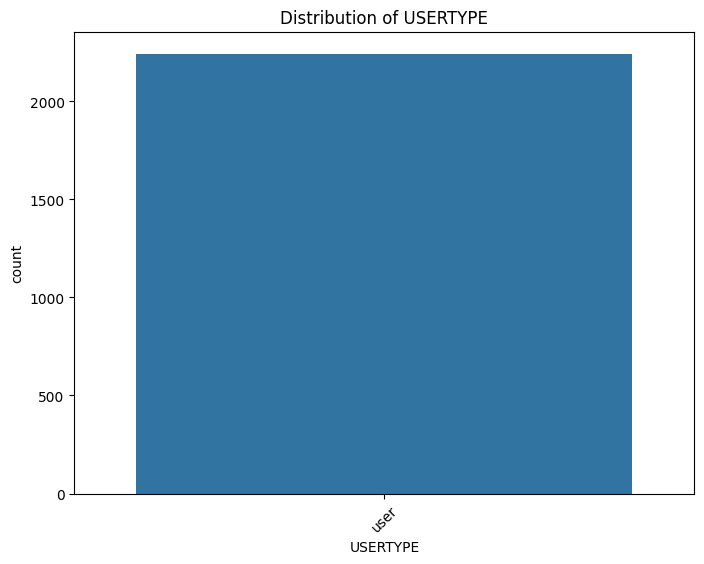

ROLE
intern               0.284440
software engineer    0.251449
consultant           0.232724
tribe master         0.222916
Intern               0.004458
Consultant           0.002229
Tribe Master         0.001337
Software Engineer    0.000446
Name: proportion, dtype: float64


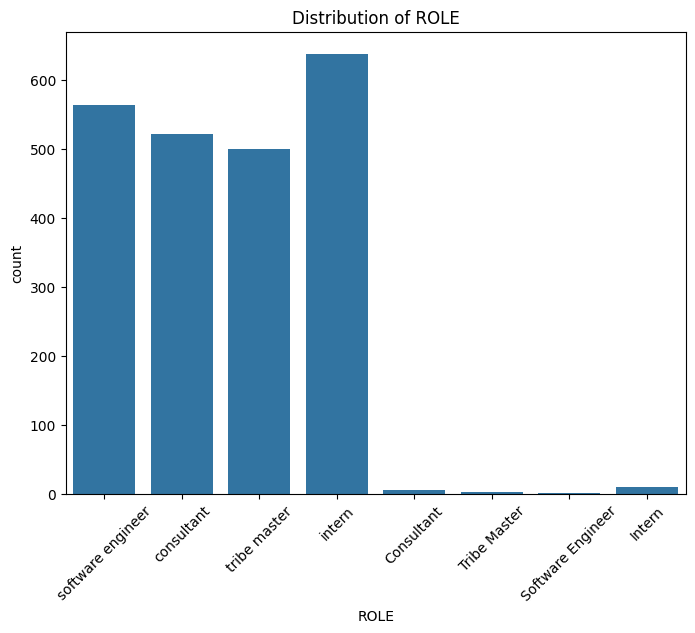

CATEGORY
Data Science       0.275970
Mobile App         0.267945
Web Development    0.267499
AI/ML              0.188587
Name: proportion, dtype: float64


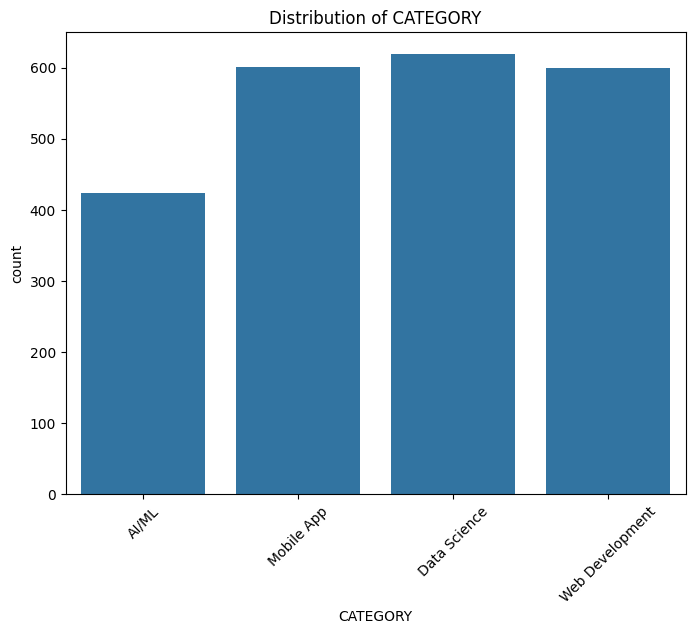

               MON          TUE          WED         THUR          FRI  \
count  2078.000000  2078.000000  2078.000000  2078.000000  2078.000000   
mean      3.925409     3.943215     4.042830     3.836381     4.037536   
std       2.515378     2.537091     2.552594     2.568313     2.606524   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       4.000000     4.000000     4.000000     4.000000     4.000000   
75%       6.000000     6.000000     6.000000     6.000000     6.000000   
max       8.000000     8.000000     8.000000     8.000000     8.000000   

               SAT          SUN  
count  2078.000000  2078.000000  
mean      4.065448     3.965833  
std       2.562000     2.550083  
min       0.000000     0.000000  
25%       2.000000     2.000000  
50%       4.000000     4.000000  
75%       6.000000     6.000000  
max       8.000000     8.000000  


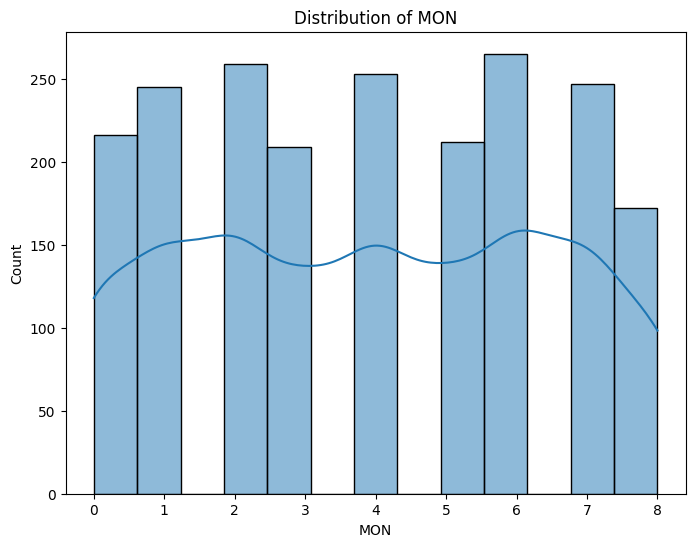

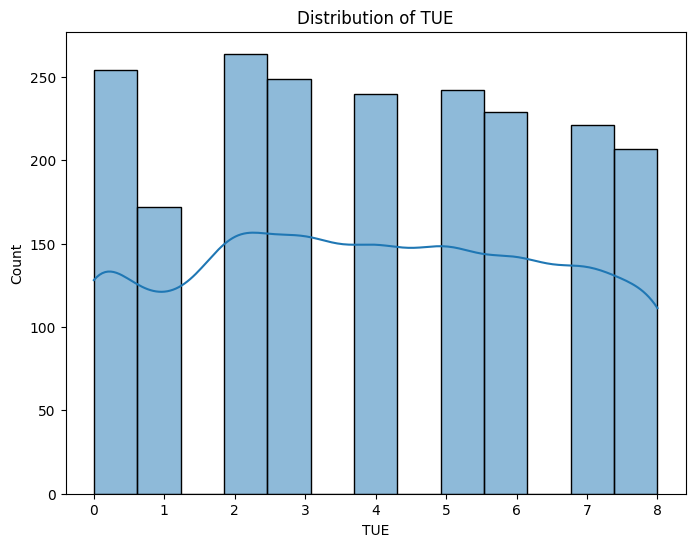

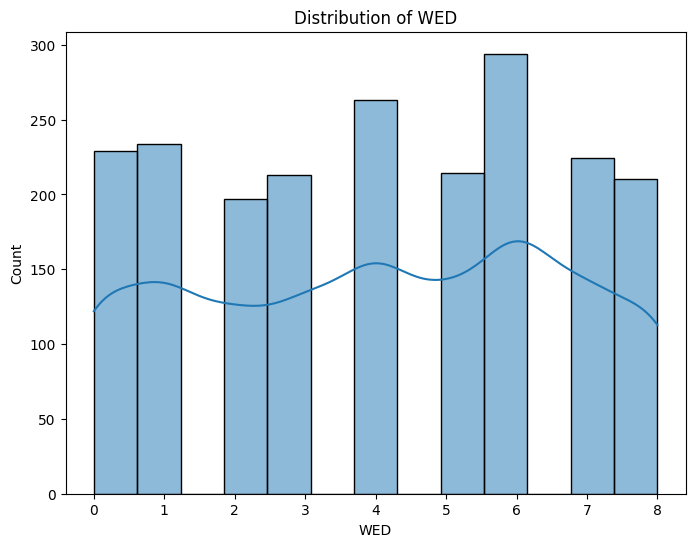

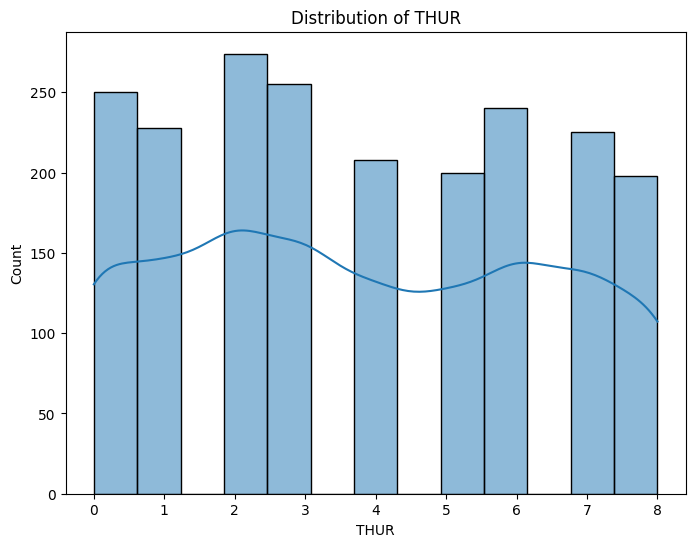

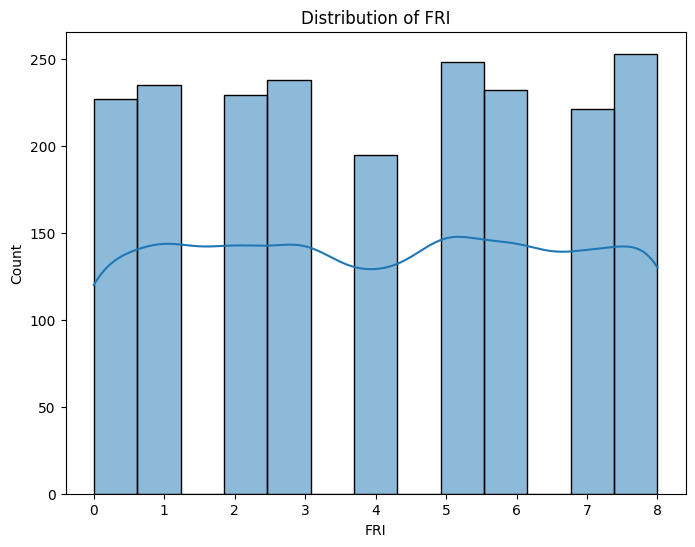

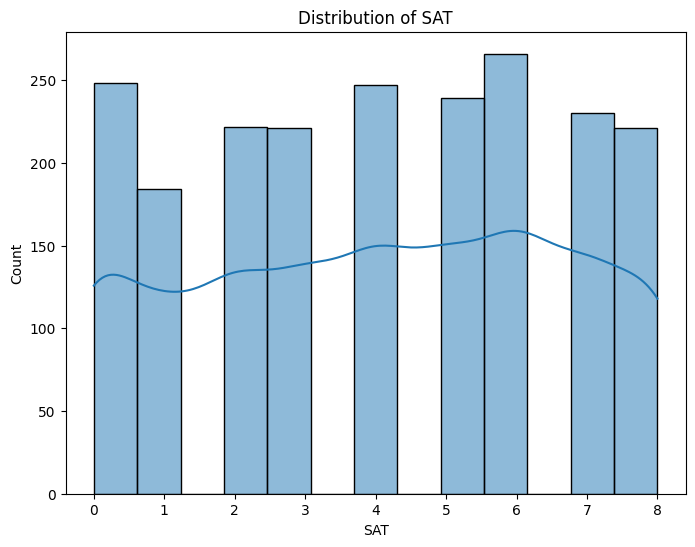

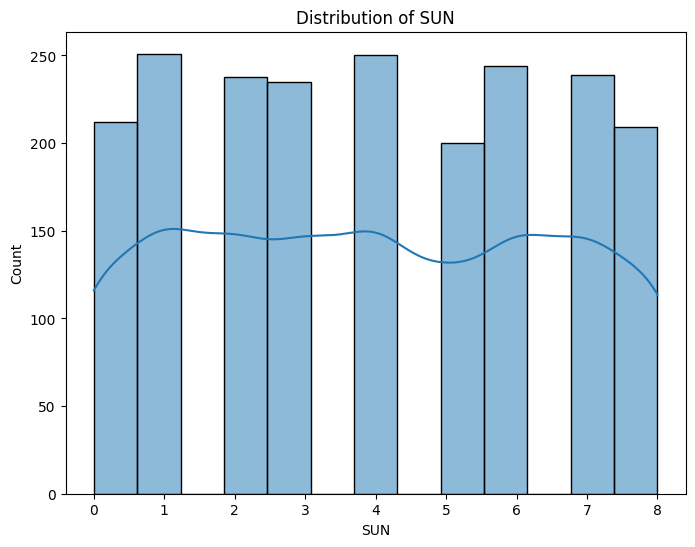

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the dataset
# Perform univariate analysis for different types of variables

# Categorical Variables
categorical_vars = ['USERTYPE', 'ROLE', 'CATEGORY']
for var in categorical_vars:
    print(df[var].value_counts(normalize=True))  # Display frequency counts and percentages
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

# Numerical Variables
numerical_vars = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN']
print(df[numerical_vars].describe())  # Display descriptive statistics
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# # Temporal Variables (assuming they are in datetime format)
# temporal_vars = ['PROJECT_START_PERIOD', 'PROJECT_END_PERIOD', 'ALLOCATION_START', 'ALLOCATION_END',
#                  'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD']
# for var in temporal_vars:
#     df[var] = pd.to_datetime(df[var])  # Convert to datetime if not already
#     df[var + '_year'] = df[var].dt.year  # Extract year component for analysis
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x=var + '_year', data=df)
#     plt.title(f'Frequency of {var} by Year')
#     plt.xticks(rotation=45)
#     plt.show()

# Textual Variables
textual_vars = ['COMMENTS', 'FEEDBACK_COMMENTS']
# Perform text preprocessing and analysis as needed


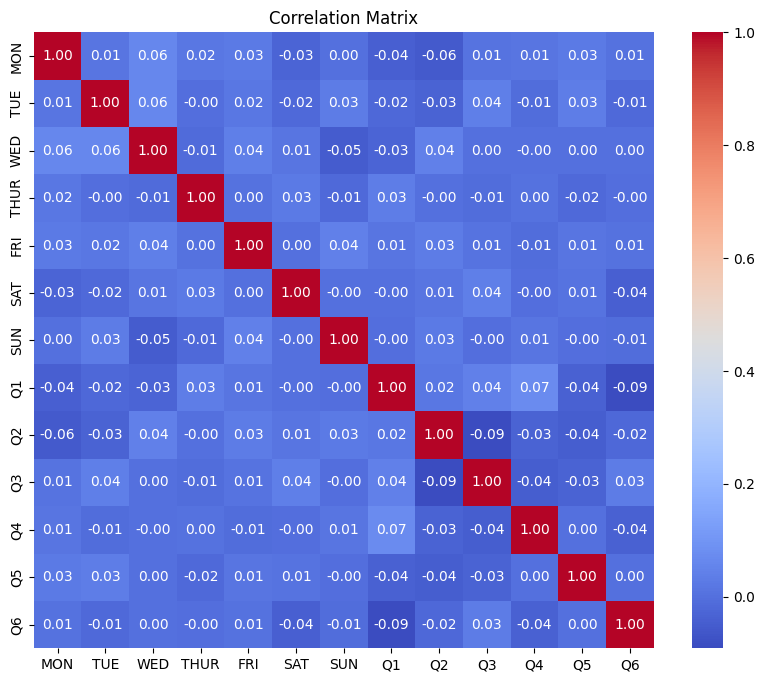

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Select numerical columns for correlation analysis
numerical_cols = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [25]:
df.head()

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,SUN,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,1.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
2,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
3,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,8.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
4,Jennifer Welch,aclark@example.org,user,consultant,Mcguire-Hall,24ac78dd-f13b-4b1c-b268-f4005d794c8e,2024-02-10,2024-06-09,Mobile App,2024-03-18,...,0.0,2024-03-19,2024-04-17,3,5,2,2,2,1,Similar left must step sound price add. Voice ...


FEATURE ENGINEERING

In [26]:
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])

    # Calculate total worked hours per week
days_of_week = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN']
df['TOTAL_WORKED_HOURS'] = df[days_of_week].sum(axis=1)

    # Display the first few rows of the DataFrame with the new column
print(df.head())

             NAME                  EMAIL USERTYPE               ROLE  \
0   Joseph Peters  abigail38@example.com     user  software engineer   
1   Joseph Peters  abigail38@example.com     user  software engineer   
2   Joseph Peters  abigail38@example.com     user  software engineer   
3   Joseph Peters  abigail38@example.com     user  software engineer   
4  Jennifer Welch     aclark@example.org     user         consultant   

        PROJECT_NAME                             PROJECTID  \
0  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
1  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
2  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
3  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
4       Mcguire-Hall  24ac78dd-f13b-4b1c-b268-f4005d794c8e   

  PROJECT_START_PERIOD PROJECT_END_PERIOD    CATEGORY ALLOCATION_START  ...  \
0           2024-03-02         2024-06-28       AI/ML       2024-03-20  ...   
1           2024-03-02         2024-

In [27]:
df.to_csv('total_worked_hours.csv', index=False)


In [28]:
def categorize_hours(total_hours):
    if total_hours < 20:
        return 'Irregular'
    elif total_hours >= 20 and total_hours < 40:
        return 'Regular'
    else:
        return 'Hard Worker'

# Apply the categorize_hours function to the 'TOTAL_WORKED_HOURS' column
df['CATEGORY'] = df['TOTAL_WORKED_HOURS'].apply(categorize_hours)

# Display the DataFrame with the new 'CATEGORY' column
print(df.head())


             NAME                  EMAIL USERTYPE               ROLE  \
0   Joseph Peters  abigail38@example.com     user  software engineer   
1   Joseph Peters  abigail38@example.com     user  software engineer   
2   Joseph Peters  abigail38@example.com     user  software engineer   
3   Joseph Peters  abigail38@example.com     user  software engineer   
4  Jennifer Welch     aclark@example.org     user         consultant   

        PROJECT_NAME                             PROJECTID  \
0  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
1  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
2  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
3  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
4       Mcguire-Hall  24ac78dd-f13b-4b1c-b268-f4005d794c8e   

  PROJECT_START_PERIOD PROJECT_END_PERIOD   CATEGORY ALLOCATION_START  ...  \
0           2024-03-02         2024-06-28    Regular       2024-03-20  ...   
1           2024-03-02         2024-06

In [29]:
df.to_csv('categorized_hours.csv', index=False)
print("Updated DataFrame saved as CSV file: categorized_hours.csv")

Updated DataFrame saved as CSV file: categorized_hours.csv


In [30]:
df.head(2)

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS,TOTAL_WORKED_HOURS
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,Regular,2024-03-20,...,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...,27.0
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,Irregular,2024-03-20,...,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...,15.0


In [31]:
df.columns

Index(['NAME', 'EMAIL', 'USERTYPE', 'ROLE', 'PROJECT_NAME', 'PROJECTID',
       'PROJECT_START_PERIOD', 'PROJECT_END_PERIOD', 'CATEGORY',
       'ALLOCATION_START', 'ALLOCATION_END', 'START_PERIOD', 'END_PERIOD',
       'ACTIVITY', 'COMMENTS', 'MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT',
       'SUN', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'FEEDBACK_COMMENTS', 'TOTAL_WORKED_HOURS'],
      dtype='object')

In [32]:
removeColumns=['NAME', 'EMAIL', 'USERTYPE',  'PROJECTID',
       'PROJECT_START_PERIOD', 'PROJECT_END_PERIOD',
       'ALLOCATION_START', 'ALLOCATION_END', 'START_PERIOD', 'END_PERIOD',
       'COMMENTS', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'FEEDBACK_COMMENTS','PROJECT_NAME']
df1=df.copy()
df1=df1.drop(columns=removeColumns)

In [33]:

df1

,ROLE,CATEGORY,ACTIVITY,MON,TUE,WED,THUR,FRI,SAT,SUN,TOTAL_WORKED_HOURS
0,software engineer,Regular,Testing,8.0,3.0,3.0,5.0,0.0,5.0,3.0,27.0
1,software engineer,Irregular,Testing,6.0,0.0,1.0,2.0,3.0,2.0,1.0,15.0
2,software engineer,Regular,Documentation,8.0,7.0,8.0,1.0,3.0,5.0,3.0,35.0
3,software engineer,Regular,Documentation,4.0,4.0,4.0,3.0,4.0,8.0,8.0,35.0
4,consultant,Regular,Meetings,7.0,3.0,1.0,8.0,3.0,1.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
2238,software engineer,Regular,Testing,3.0,8.0,7.0,0.0,3.0,3.0,2.0,26.0
2239,software engineer,Regular,Documentation,8.0,8.0,0.0,8.0,1.0,7.0,6.0,38.0
2240,software engineer,Irregular,Testing,1.0,6.0,1.0,1.0,5.0,1.0,2.0,17.0
2241,software engineer,Hard Worker,Testing,2.0,5.0,6.0,6.0,7.0,7.0,7.0,40.0


In [34]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()
df1['ROLE'] = df1['ROLE'].str.lower()


# Assume df is your DataFrame with the columns ROLE and CATEGORY
df1['ROLE_ENCODED'] = label_encoder.fit_transform(df1['ROLE'])
df1['ACTIVITY_ENCODED'] = label_encoder.fit_transform(df1['ACTIVITY'])

# Display the updated DataFrame
df1.head()

,ROLE,CATEGORY,ACTIVITY,MON,TUE,WED,THUR,FRI,SAT,SUN,TOTAL_WORKED_HOURS,ROLE_ENCODED,ACTIVITY_ENCODED
0,software engineer,Regular,Testing,8.0,3.0,3.0,5.0,0.0,5.0,3.0,27.0,2,3
1,software engineer,Irregular,Testing,6.0,0.0,1.0,2.0,3.0,2.0,1.0,15.0,2,3
2,software engineer,Regular,Documentation,8.0,7.0,8.0,1.0,3.0,5.0,3.0,35.0,2,1
3,software engineer,Regular,Documentation,4.0,4.0,4.0,3.0,4.0,8.0,8.0,35.0,2,1
4,consultant,Regular,Meetings,7.0,3.0,1.0,8.0,3.0,1.0,0.0,23.0,0,2


In [35]:
df1=df1.drop(columns=['ROLE','ACTIVITY'])

In [36]:
df1.shape

(2243, 11)

In [37]:
df1.drop_duplicates(keep='first', inplace=True)

In [38]:
df1.dropna(inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'CATEGORY' is the column you want to label encode
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df1['CATEGORY'])

# Assign the encoded target variable to y
y = y_encoded

# Drop the 'CATEGORY' column from X
X = df1.drop(columns='CATEGORY')


In [40]:
df1

,CATEGORY,MON,TUE,WED,THUR,FRI,SAT,SUN,TOTAL_WORKED_HOURS,ROLE_ENCODED,ACTIVITY_ENCODED
0,Regular,8.0,3.0,3.0,5.0,0.0,5.0,3.0,27.0,2,3
1,Irregular,6.0,0.0,1.0,2.0,3.0,2.0,1.0,15.0,2,3
2,Regular,8.0,7.0,8.0,1.0,3.0,5.0,3.0,35.0,2,1
3,Regular,4.0,4.0,4.0,3.0,4.0,8.0,8.0,35.0,2,1
4,Regular,7.0,3.0,1.0,8.0,3.0,1.0,0.0,23.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
2235,Regular,4.0,3.0,6.0,0.0,8.0,5.0,4.0,30.0,2,3
2236,Regular,5.0,5.0,0.0,8.0,1.0,1.0,8.0,28.0,2,3
2240,Irregular,1.0,6.0,1.0,1.0,5.0,1.0,2.0,17.0,2,3
2241,Hard Worker,2.0,5.0,6.0,6.0,7.0,7.0,7.0,40.0,2,3


In [41]:
X.columns

Index(['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN', 'TOTAL_WORKED_HOURS',
       'ROLE_ENCODED', 'ACTIVITY_ENCODED'],
      dtype='object')

In [42]:
X.duplicated().sum()

0

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [44]:
for column in df1.columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [45]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [46]:
y_train

array([1, 2, 2, ..., 2, 2, 2])

In [47]:
# Assuming y_train contains the target labels
#naive bayes
# Introduce class imbalance by reducing the representation of a certain class
# For example, if the class of interest is labeled as 1:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

X_train_imbalanced = X_train[y_train != 1]
y_train_imbalanced = y_train[y_train != 1]

# Train the classifier using the imbalanced training data
nb_classifier.fit(X_train_imbalanced, y_train_imbalanced)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00        21
           2       0.86      0.99      0.92       134

    accuracy                           0.86       159
   macro avg       0.55      0.66      0.60       159
weighted avg       0.75      0.86      0.80       159



c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [48]:

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, classification_report



# # Initialize the Naive Bayes classifier
# nb_classifier = GaussianNB()

# # Train the classifier using the training data
# nb_classifier.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = nb_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Generate a classification report
# report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(report)

In [49]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler()

# Undersample the majority class
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_noisy, y_train)

# Train the model using the resampled data
pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with class imbalance: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


NameError: name 'X_train_noisy' is not defined

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report


# # Initialize the Logistic Regression model
# logreg_model = LogisticRegression()

# # Train the model using the training data
# logreg_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = logreg_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Generate a classification report
# report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(report)


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Introduce random noise to the features
X_train_noisy = X_train + np.random.normal(0, 5, size=X_train.shape)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model using the noisy training data
logreg_model.fit(X_train_noisy, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy : 0.92
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      0.52      0.69        21
           2       0.91      1.00      0.95       134

    accuracy                           0.92       159
   macro avg       0.97      0.59      0.68       159
weighted avg       0.93      0.92      0.90       159



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize the Logistic Regression model
# logreg_model = LogisticRegression()

# # Train the model using the training data
# logreg_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = logreg_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Generate a classification report
# report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(report)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.96      0.98        23
           2       0.99      1.00      0.99       134

    accuracy                           0.99       160
   macro avg       1.00      0.87      0.92       160
weighted avg       0.99      0.99      0.99       160



c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install imbalanced-learn

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Initialize and train the Logistic Regression model
# logreg_model = LogisticRegression()
# logreg_model.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
# y_pred = logreg_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Generate a classification report
# report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00       134

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Introduce random noise to the scaled features
X_train_scaled_noisy = X_train_scaled + np.random.normal(0, 1, size=X_train_scaled.shape)
X_test_scaled_noisy = X_test_scaled + np.random.normal(0, 0.2, size=X_test_scaled.shape)

# Initialize the KNN model
knn_model_noisy = KNeighborsClassifier(n_neighbors=5)

# Train the model using the noisy training data
knn_model_noisy.fit(X_train_scaled_noisy, y_train)

# Make predictions on the testing data
y_pred_noisy = knn_model_noisy.predict(X_test_scaled_noisy)

# Evaluate the model
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f'Accuracy with noisy data: {accuracy_noisy:.2f}')

# Generate a classification report
report_noisy = classification_report(y_test, y_pred_noisy)
print('Classification Report with noisy data:')
print(report_noisy)


Accuracy with noisy data: 0.87
Classification Report with noisy data:
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.86      0.45      0.59        40
           2       0.88      0.98      0.93       263

    accuracy                           0.87       318
   macro avg       0.75      0.50      0.55       318
weighted avg       0.86      0.87      0.85       318



In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming df1 is
# # Standardize the features by scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize the KNN model
# knn_model = KNeighborsClassifier(n_neighbors=5)

# # Train the model using the training data
# knn_model.fit(X_train_scaled, y_train)

# # Make predictions on the testing data
# y_pred = knn_model.predict(X_test_scaled)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Generate a classification report
# report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(report)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled_noisy, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_scaled_noisy)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy with Random Forest Classifier: {accuracy_rf:.2f}')

# Generate a classification report
report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report with Random Forest Classifier:')
print(report_rf)


Accuracy with Random Forest Classifier: 0.87
Classification Report with Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       1.00      0.38      0.55        40
           2       0.87      1.00      0.93       263

    accuracy                           0.87       318
   macro avg       0.62      0.46      0.49       318
weighted avg       0.84      0.87      0.84       318



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
